In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('climate change agriculture data.csv')

In [7]:
df.columns

Index(['Year', 'Country', 'Region', 'Crop_Type', 'Average_Temperature_C',
       'Average_Temp_F', 'Total_Precipitation_mm', 'CO2_Emissions_MT',
       'Crop_Yield_MT_per_HA', 'Extreme_Weather_Events', 'Irrigation_Access_%',
       'Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA',
       'Soil_Health_Index', 'Adaptation_Strategies',
       'Economic_Impact_Million_USD'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Year                         10000 non-null  int64  
 1   Country                      10000 non-null  object 
 2   Region                       10000 non-null  object 
 3   Crop_Type                    10000 non-null  object 
 4   Average_Temperature_C        10000 non-null  float64
 5   Average_Temp_F               10000 non-null  float64
 6   Total_Precipitation_mm       10000 non-null  float64
 7   CO2_Emissions_MT             10000 non-null  float64
 8   Crop_Yield_MT_per_HA         10000 non-null  float64
 9   Extreme_Weather_Events       10000 non-null  int64  
 10  Irrigation_Access_%          10000 non-null  float64
 11  Pesticide_Use_KG_per_HA      10000 non-null  float64
 12  Fertilizer_Use_KG_per_HA     10000 non-null  float64
 13  Soil_Health_Index

In [10]:
df.describe()

Year  Average_Temperature_C  Average_Temp_F  \
count  10000.000000           10000.000000     10000.00000   
mean    2007.088700              15.241299        59.43559   
std       10.084245              11.466955        20.64060   
min     1990.000000              -4.990000        23.00000   
25%     1999.000000               5.430000        41.80000   
50%     2007.000000              15.175000        59.30000   
75%     2016.000000              25.340000        77.60000   
max     2024.000000              35.000000        95.00000   

       Total_Precipitation_mm  CO2_Emissions_MT  Crop_Yield_MT_per_HA  \
count            10000.000000      10000.000000          10000.000000   
mean              1611.663834         15.246608              2.240017   
std                805.016815          8.589423              0.998342   
min                200.150000          0.500000              0.450000   
25%                925.697500          7.760000              1.449000   
50%               1611.160000         15.200000              2.170000   
75%               2306.997500         22.820000              2.930000   
max               2999.670000         30.000000              5.000000   

       Extreme_Weather_Events  Irrigation_Access_%  Pesticide_Use_KG_per_HA  \
count            10000.000000         10000.000000             10000.000000   
mean                 4.980900            55.248332                24.955735   
std                  3.165808            25.988305                14.490962   
min                  0.000000            10.010000                 0.000000   
25%                  2.000000            32.677500                12.527500   
50%                  5.000000            55.175000                24.930000   
75%                  8.000000            77.582500                37.470000   
max                 10.000000            99.990000                49.990000   

       Fertilizer_Use_KG_per_HA  Soil_Health_Index  \
count              10000.000000       10000.000000   
mean                  49.973708          64.901278   
std                   28.711027          20.195882   
min                    0.010000          30.000000   
25%                   25.390000          47.235000   
50%                   49.635000          64.650000   
75%                   74.825000          82.472500   
max                   99.990000         100.000000   

       Economic_Impact_Million_USD  
count                 10000.000000  
mean                    674.269658  
std                     414.591431  
min                      47.840000  
25%                     350.545000  
50%                     583.920000  
75%                     917.505000  
max                    2346.470000

In [11]:
#Broad Question 1: How is climate change affecting agricultural productivity
#across different regions?
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [12]:
#1 Correlation Analysis Between Climate Variables and Crop Yield
correlation_matrix = df[['Average_Temperature_C', 'Total_Precipitation_mm', 'CO2_Emissions_MT', 'Crop_Yield_MT_per_HA']].corr()
print("Correlation Matrix:\n", correlation_matrix)

Correlation Matrix:
                         Average_Temperature_C  Total_Precipitation_mm  \
Average_Temperature_C                1.000000                0.007213   
Total_Precipitation_mm               0.007213                1.000000   
CO2_Emissions_MT                    -0.003052               -0.008681   
Crop_Yield_MT_per_HA                 0.263781                0.029728   

                        CO2_Emissions_MT  Crop_Yield_MT_per_HA  
Average_Temperature_C          -0.003052              0.263781  
Total_Precipitation_mm         -0.008681              0.029728  
CO2_Emissions_MT                1.000000             -0.089868  
Crop_Yield_MT_per_HA           -0.089868              1.000000  


In [13]:
#2 Regional Analysis: Average Yield by Region
regional_yield = df.groupby('Region')['Crop_Yield_MT_per_HA'].mean().sort_values(ascending=False)
print("\nAverage Crop Yield by Region:\n", regional_yield)


Average Crop Yield by Region:
 Region
Southeast                     2.412279
Tamil Nadu                    2.337076
Queensland                    2.319933
West                          2.319809
South West                    2.302296
Northwest                     2.297377
North West                    2.294102
North Central                 2.293621
Central                       2.288494
Punjab                        2.271368
Ile-de-France                 2.268195
Provence-Alpes-Cote d’Azur    2.262970
Quebec                        2.262661
East                          2.261839
Northeast                     2.249778
Ontario                       2.246342
Patagonia                     2.235052
South East                    2.227942
British Columbia              2.221624
New South Wales               2.220170
Western Australia             2.214827
Maharashtra                   2.206846
South                         2.206420
Volga                         2.204605
North                    

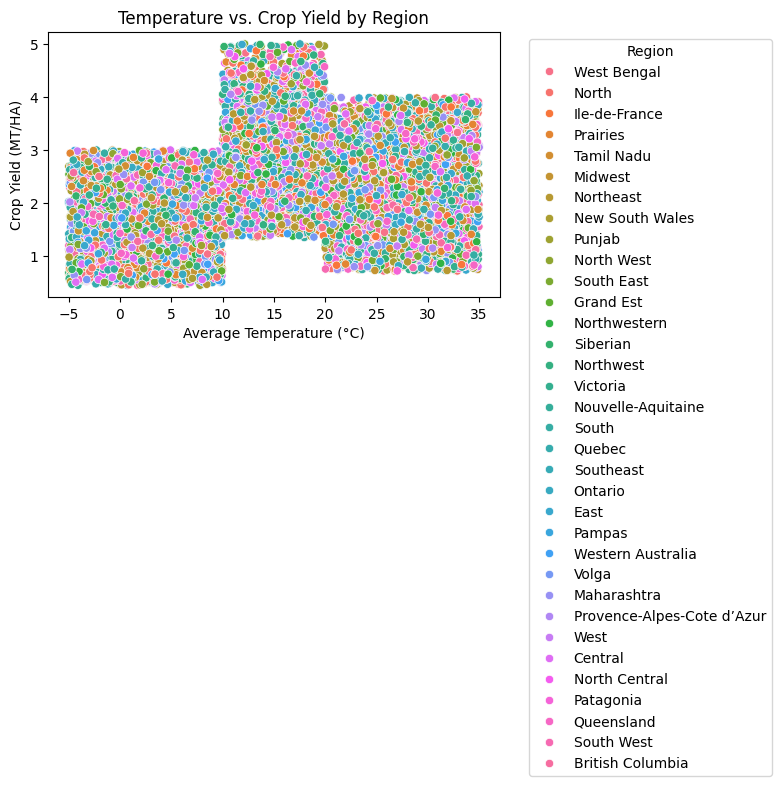

In [14]:
#3 Visualizing the Relationship Between Temperature and Crop Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Average_Temperature_C', y='Crop_Yield_MT_per_HA', hue='Region', data=df)
plt.title('Temperature vs. Crop Yield by Region')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Crop Yield (MT/HA)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [16]:
#4 Extreme Weather Events and Crop Yield
extreme_weather_effect = df.groupby('Extreme_Weather_Events')['Crop_Yield_MT_per_HA'].mean()
print("\nEffect of Extreme Weather Events on Crop Yield:\n", extreme_weather_effect)


Effect of Extreme Weather Events on Crop Yield:
 Extreme_Weather_Events
0     2.217234
1     2.227046
2     2.267031
3     2.304328
4     2.249926
5     2.222763
6     2.235631
7     2.211072
8     2.225711
9     2.256677
10    2.222046
Name: Crop_Yield_MT_per_HA, dtype: float64


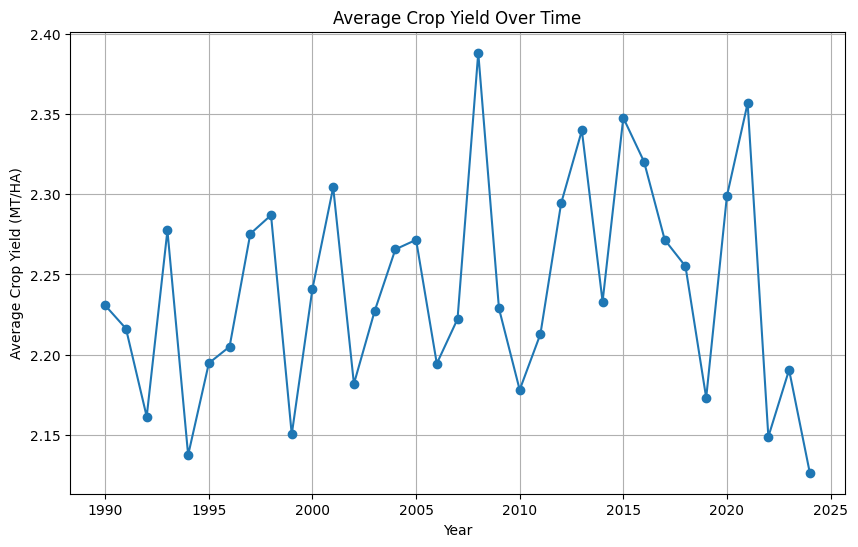

In [17]:
#5 Long-Term Trends (data includes multiple years)
if 'Year' in df.columns:
    year_trends = df.groupby('Year')['Crop_Yield_MT_per_HA'].mean()
    plt.figure(figsize=(10, 6))
    plt.plot(year_trends, marker='o')
    plt.title('Average Crop Yield Over Time')
    plt.xlabel('Year')
    plt.ylabel('Average Crop Yield (MT/HA)')
    plt.grid()
    plt.show()

In [19]:
#Broad Question 2: What are the most effective adaptation strategies for
# maintaining agricultural productivity?
import pandas as pd
import matplotlib.pyplot as plt
# 1. Average Crop Yield by Adaptation Strategy
strategy_yield = df.groupby('Adaptation_Strategies')['Crop_Yield_MT_per_HA'].mean().sort_values(ascending=False)
print("Average Crop Yield by Adaptation Strategy:\n", strategy_yield)


Average Crop Yield by Adaptation Strategy:
 Adaptation_Strategies
Crop Rotation              2.271590
Drought-resistant Crops    2.244425
Organic Farming            2.238188
No Adaptation              2.237939
Water Management           2.209385
Name: Crop_Yield_MT_per_HA, dtype: float64


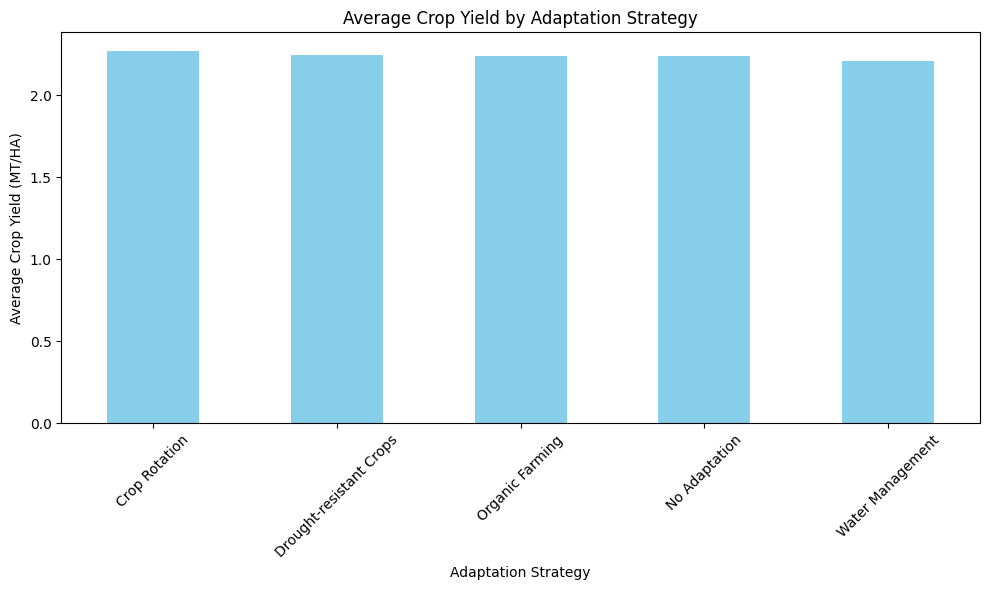

In [20]:
#visualization: Average Crop Yield by Adaptation Strategy
plt.figure(figsize=(10, 6))
strategy_yield.plot(kind='bar', color='skyblue')
plt.title('Average Crop Yield by Adaptation Strategy')
plt.xlabel('Adaptation Strategy')
plt.ylabel('Average Crop Yield (MT/HA)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [21]:
#2 Climate Conditions by Adaptation Strategy
climate_conditions = df.groupby('Adaptation_Strategies')[['Average_Temperature_C', 'Total_Precipitation_mm', 'Irrigation_Access_%']].mean()
print("\nAverage Climate Conditions by Adaptation Strategy:\n", climate_conditions)



Average Climate Conditions by Adaptation Strategy:
                          Average_Temperature_C  Total_Precipitation_mm  \
Adaptation_Strategies                                                    
Crop Rotation                        15.672299             1625.692826   
Drought-resistant Crops              15.352802             1596.157454   
No Adaptation                        14.873943             1620.333498   
Organic Farming                      15.165808             1610.241023   
Water Management                     15.156725             1606.170005   

                         Irrigation_Access_%  
Adaptation_Strategies                         
Crop Rotation                      55.373562  
Drought-resistant Crops            54.798902  
No Adaptation                      55.711621  
Organic Farming                    55.502957  
Water Management                   54.863245  


In [23]:
#3 Effect of Extreme Weather on Strategies
weather_yield = df.groupby(['Adaptation_Strategies', 'Extreme_Weather_Events'])['Crop_Yield_MT_per_HA'].mean().unstack()
print("\nEffect of Extreme Weather Events on Crop Yield by Adaptation Strategy:\n", weather_yield)



Effect of Extreme Weather Events on Crop Yield by Adaptation Strategy:
 Extreme_Weather_Events         0         1         2         3         4   \
Adaptation_Strategies                                                       
Crop Rotation            2.333099  2.226144  2.407189  2.180393  2.223532   
Drought-resistant Crops  2.215649  2.141962  2.313026  2.344121  2.282006   
No Adaptation            2.261434  2.330342  2.191434  2.287021  2.300569   
Organic Farming          2.107441  2.253933  2.223682  2.339902  2.188326   
Water Management         2.161380  2.165580  2.186449  2.362604  2.245531   

Extreme_Weather_Events         5         6         7         8         9   \
Adaptation_Strategies                                                       
Crop Rotation            2.238128  2.267320  2.339618  2.297740  2.232989   
Drought-resistant Crops  2.213864  2.198971  2.131419  2.325209  2.310544   
No Adaptation            2.200917  2.250061  2.215023  2.142773  2.238093   
Or

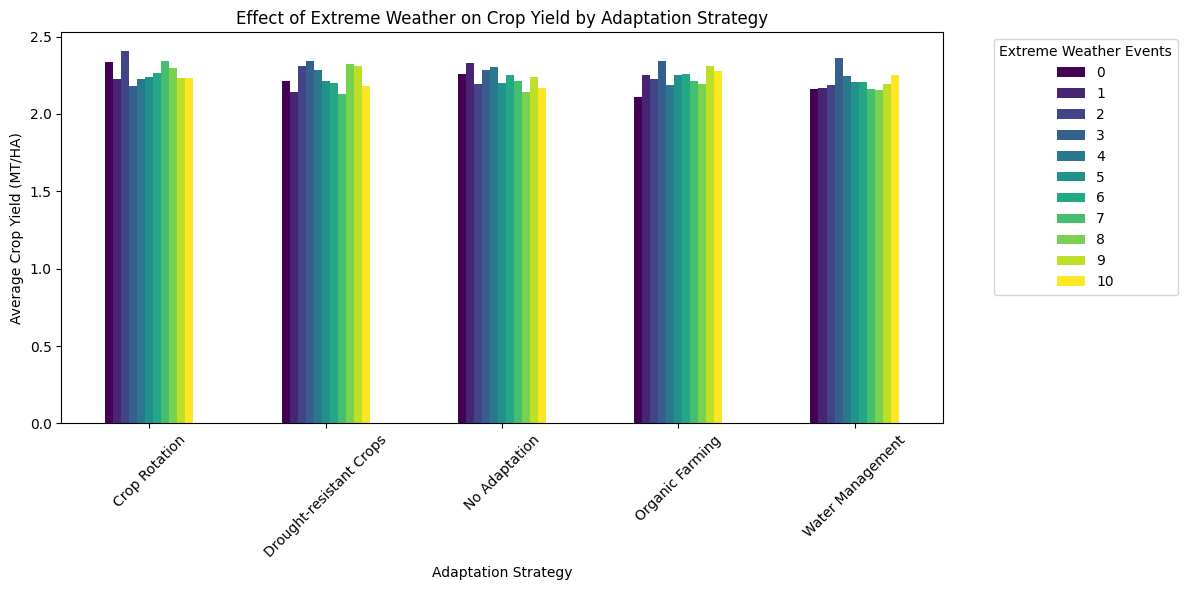

In [24]:
#Visualization: Extreme Weather vs. Adaptation Strategies
weather_yield.plot(kind='bar', figsize=(12, 6), colormap='viridis')
plt.title('Effect of Extreme Weather on Crop Yield by Adaptation Strategy')
plt.xlabel('Adaptation Strategy')
plt.ylabel('Average Crop Yield (MT/HA)')
plt.xticks(rotation=45)
plt.legend(title='Extreme Weather Events', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
#4 Economic Impact by Adaptation Strategy
economic_impact = df.groupby('Adaptation_Strategies')['Economic_Impact_Million_USD'].mean().sort_values(ascending=False)
print("\nAverage Economic Impact by Adaptation Strategy:\n", economic_impact)



Average Economic Impact by Adaptation Strategy:
 Adaptation_Strategies
Drought-resistant Crops    686.226637
Crop Rotation              685.324149
No Adaptation              677.879363
Organic Farming            663.542228
Water Management           658.843997
Name: Economic_Impact_Million_USD, dtype: float64


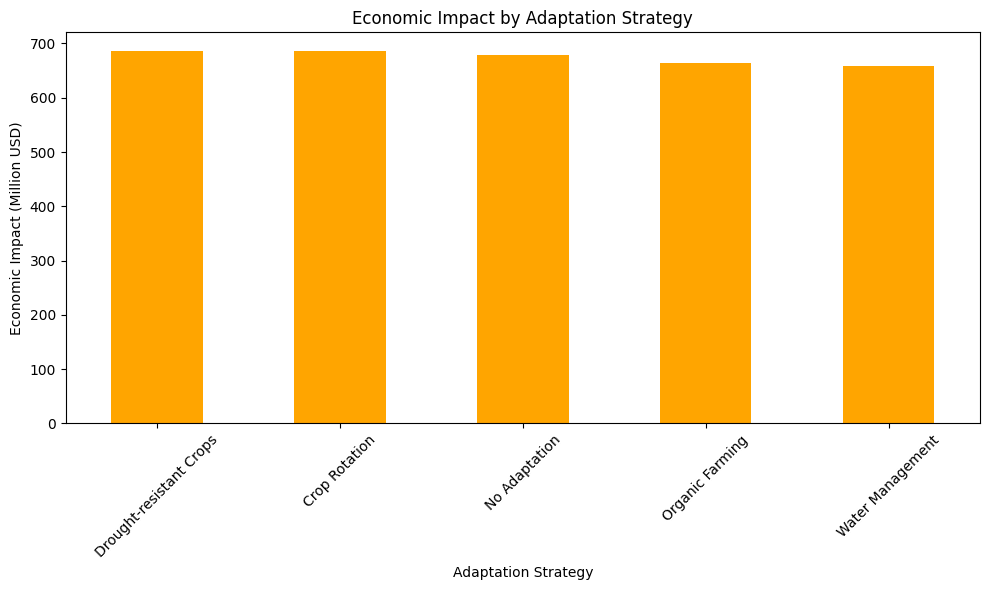

In [26]:
# Visualization: Economic Impact by Adaptation Strategy
plt.figure(figsize=(10, 6))
economic_impact.plot(kind='bar', color='orange')
plt.title('Economic Impact by Adaptation Strategy')
plt.xlabel('Adaptation Strategy')
plt.ylabel('Economic Impact (Million USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**detailed questions**: How does irrigation access correlate with crop yields in regions experiencing temperature increases or changes in precipitation patterns?






In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1 Correlation Between Irrigation Access and Crop Yield
correlation = df[['Irrigation_Access_%', 'Crop_Yield_MT_per_HA']].corr().iloc[0, 1]
print(f"Correlation Between Irrigation Access and Crop Yield: {correlation:.2f}")

Correlation Between Irrigation Access and Crop Yield: -0.00


In [30]:
#2 Analyze Yield vs. Irrigation by Temperature Range
df['Temperature_Range'] = pd.cut(df['Average_Temperature_C'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                   labels=['Low (<10°C)', 'Moderate (10-20°C)', 'High (20-30°C)', 'Very High (>30°C)'])
temp_irrigation_yield = df.groupby('Temperature_Range')[['Irrigation_Access_%', 'Crop_Yield_MT_per_HA']].mean()
print("\nAverage Irrigation Access and Crop Yield by Temperature Range:\n", temp_irrigation_yield)



Average Irrigation Access and Crop Yield by Temperature Range:
                     Irrigation_Access_%  Crop_Yield_MT_per_HA
Temperature_Range                                            
Low (<10°C)                   55.677058              1.634074
Moderate (10-20°C)            55.170008              3.028568
High (20-30°C)                55.088522              2.288911
Very High (>30°C)             54.493658              2.305683


<ipython-input-30-d25dbaf3c396>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_irrigation_yield = df.groupby('Temperature_Range')[['Irrigation_Access_%', 'Crop_Yield_MT_per_HA']].mean()


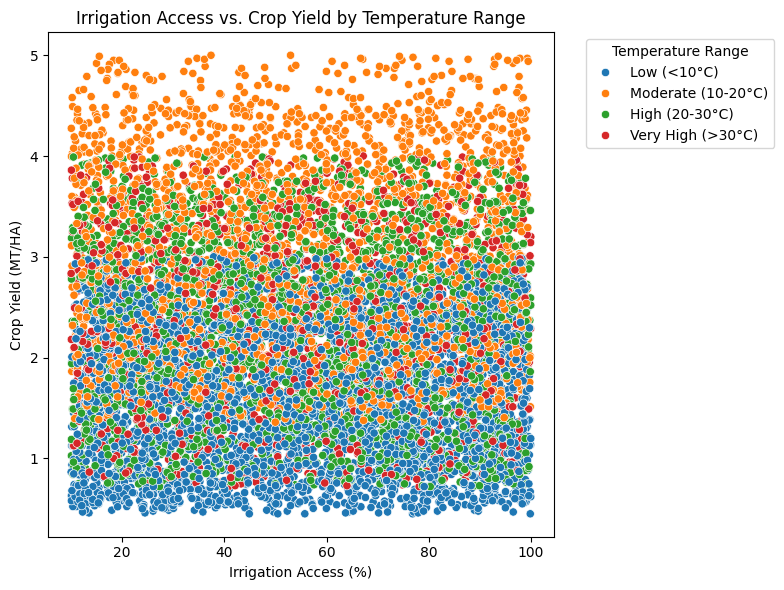

In [31]:
#Visualization: Crop Yield vs. Irrigation Access by Temperature Range
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Irrigation_Access_%', y='Crop_Yield_MT_per_HA', hue='Temperature_Range', data=df)
plt.title('Irrigation Access vs. Crop Yield by Temperature Range')
plt.xlabel('Irrigation Access (%)')
plt.ylabel('Crop Yield (MT/HA)')
plt.legend(title='Temperature Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [32]:
#3 Analyze Yield vs. Irrigation by Precipitation Range
df['Precipitation_Range'] = pd.cut(df['Total_Precipitation_mm'], bins=[-float('inf'), 500, 1500, 2500, float('inf')],
                                     labels=['Low (<500 mm)', 'Moderate (500-1500 mm)', 'High (1500-2500 mm)', 'Very High (>2500 mm)'])
precip_irrigation_yield = df.groupby('Precipitation_Range')[['Irrigation_Access_%', 'Crop_Yield_MT_per_HA']].mean()
print("\nAverage Irrigation Access and Crop Yield by Precipitation Range:\n", precip_irrigation_yield)



Average Irrigation Access and Crop Yield by Precipitation Range:
                         Irrigation_Access_%  Crop_Yield_MT_per_HA
Precipitation_Range                                              
Low (<500 mm)                     55.922807              2.117155
Moderate (500-1500 mm)            55.531339              2.250615
High (1500-2500 mm)               54.800726              2.262441
Very High (>2500 mm)              55.187752              2.243917


<ipython-input-32-02d9ccf80925>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precip_irrigation_yield = df.groupby('Precipitation_Range')[['Irrigation_Access_%', 'Crop_Yield_MT_per_HA']].mean()


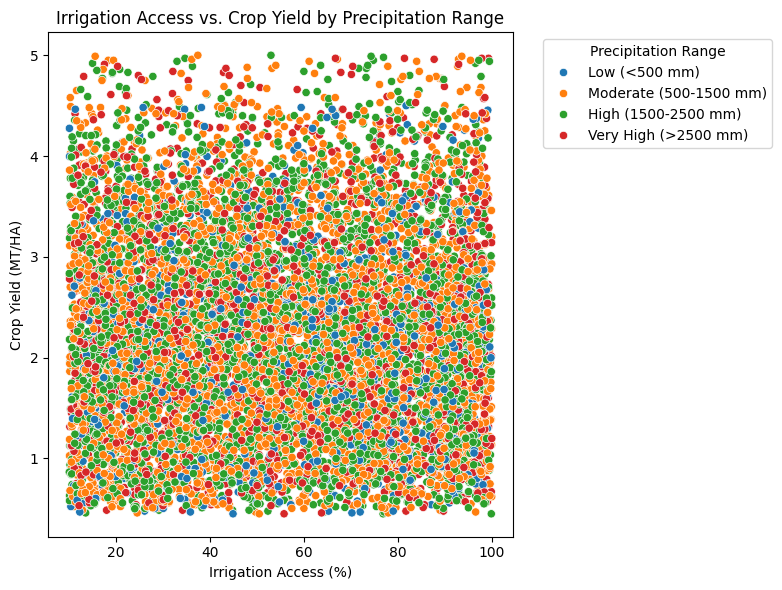

In [33]:
#Visualization: Crop Yield vs. Irrigation Access by Precipitation Range
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Irrigation_Access_%', y='Crop_Yield_MT_per_HA', hue='Precipitation_Range', data=df)
plt.title('Irrigation Access vs. Crop Yield by Precipitation Range')
plt.xlabel('Irrigation Access (%)')
plt.ylabel('Crop Yield (MT/HA)')
plt.legend(title='Precipitation Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

What is the relationship between soil health index and crop yields, and how does this relationship change under different climate conditions?


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Correlation Between Soil Health Index and Crop Yield
correlation = df[['Soil_Health_Index', 'Crop_Yield_MT_per_HA']].corr().iloc[0, 1]
print(f"Correlation Between Soil Health Index and Crop Yield: {correlation:.2f}")

Correlation Between Soil Health Index and Crop Yield: -0.01


In [36]:
#2 Soil Health vs. Crop Yield Under Different Temperature Conditions
df['Temperature_Range'] = pd.cut(df['Average_Temperature_C'], bins=[-float('inf'), 10, 20, 30, float('inf')],
                                   labels=['Low (<10°C)', 'Moderate (10-20°C)', 'High (20-30°C)', 'Very High (>30°C)'])
temp_soil_yield = df.groupby('Temperature_Range')[['Soil_Health_Index', 'Crop_Yield_MT_per_HA']].mean()
print("\nAverage Soil Health Index and Crop Yield by Temperature Range:\n", temp_soil_yield)


Average Soil Health Index and Crop Yield by Temperature Range:
                     Soil_Health_Index  Crop_Yield_MT_per_HA
Temperature_Range                                          
Low (<10°C)                 64.882316              1.634074
Moderate (10-20°C)          65.195739              3.028568
High (20-30°C)              64.760807              2.288911
Very High (>30°C)           64.644350              2.305683


<ipython-input-36-644526d66307>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_soil_yield = df.groupby('Temperature_Range')[['Soil_Health_Index', 'Crop_Yield_MT_per_HA']].mean()


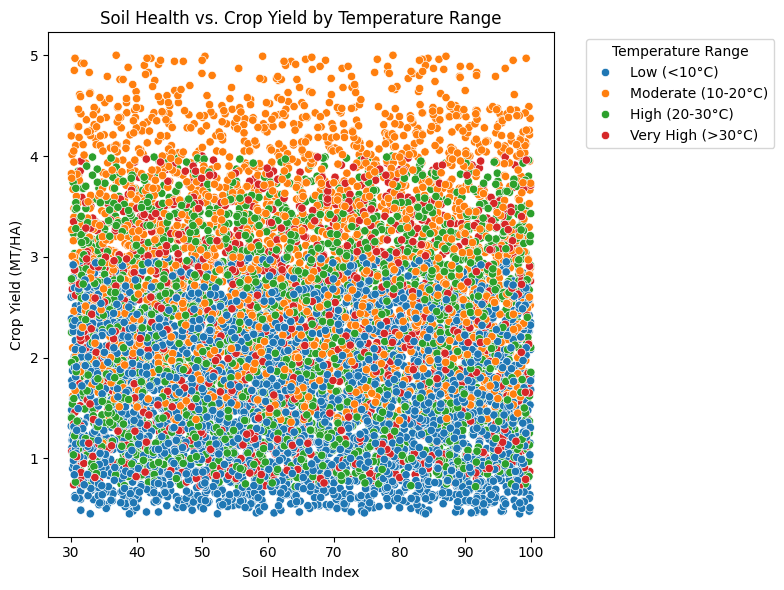

In [37]:
#Scatter Plot: Soil Health vs. Crop Yield by Temperature Range
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Soil_Health_Index', y='Crop_Yield_MT_per_HA', hue='Temperature_Range', data=df)
plt.title('Soil Health vs. Crop Yield by Temperature Range')
plt.xlabel('Soil Health Index')
plt.ylabel('Crop Yield (MT/HA)')
plt.legend(title='Temperature Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [38]:
#3 Soil Health vs. Crop Yield Under Different Precipitation Conditions
df['Precipitation_Range'] = pd.cut(df['Total_Precipitation_mm'], bins=[-float('inf'), 500, 1500, 2500, float('inf')],
                                     labels=['Low (<500 mm)', 'Moderate (500-1500 mm)', 'High (1500-2500 mm)', 'Very High (>2500 mm)'])
precip_soil_yield = df.groupby('Precipitation_Range')[['Soil_Health_Index', 'Crop_Yield_MT_per_HA']].mean()
print("\nAverage Soil Health Index and Crop Yield by Precipitation Range:\n", precip_soil_yield)



Average Soil Health Index and Crop Yield by Precipitation Range:
                         Soil_Health_Index  Crop_Yield_MT_per_HA
Precipitation_Range                                            
Low (<500 mm)                   65.577694              2.117155
Moderate (500-1500 mm)          65.096189              2.250615
High (1500-2500 mm)             65.100754              2.262441
Very High (>2500 mm)            63.742997              2.243917


<ipython-input-38-3950ff4dbe1b>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precip_soil_yield = df.groupby('Precipitation_Range')[['Soil_Health_Index', 'Crop_Yield_MT_per_HA']].mean()


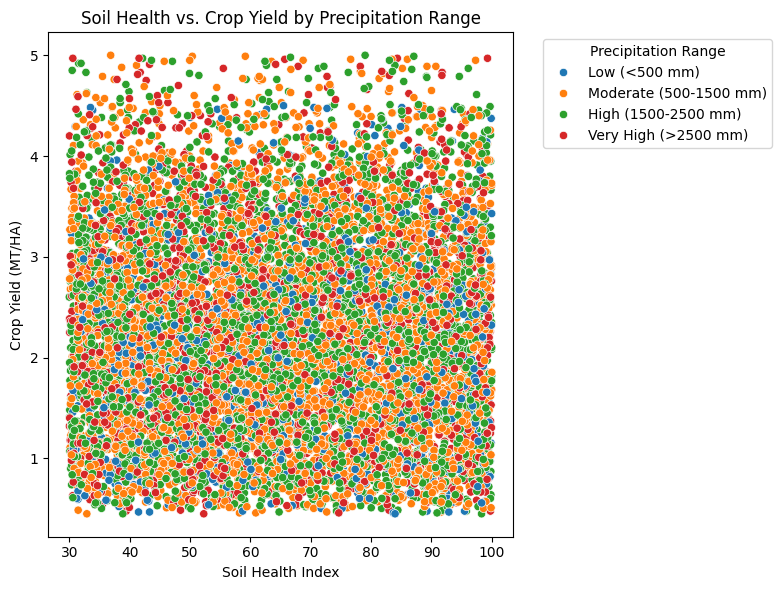

In [39]:
#Scatter Plot: Soil Health vs. Crop Yield by Precipitation Range
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Soil_Health_Index', y='Crop_Yield_MT_per_HA', hue='Precipitation_Range', data=df)
plt.title('Soil Health vs. Crop Yield by Precipitation Range')
plt.xlabel('Soil Health Index')
plt.ylabel('Crop Yield (MT/HA)')
plt.legend(title='Precipitation Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1 Correlation Between Soil Health Index and Crop Yield
correlation = df[['Soil_Health_Index', 'Crop_Yield_MT_per_HA']].corr().iloc[0, 1]
print(f"Correlation Between Soil Health Index and Crop Yield: {correlation:.2f}")

Correlation Between Soil Health Index and Crop Yield: -0.01


In [43]:
#2 Soil Health vs. Crop Yield Under Different Temperature Conditions
#bin temperature into ranges
df['Temperature_Range'] = pd.cut(
    df['Average_Temperature_C'],
    bins=[-float('inf'), 10, 20, 30, float('inf')],
    labels=['Low (<10°C)', 'Moderate (10-20°C)', 'High (20-30°C)', 'Very High (>30°C)']
)
temp_soil_yield = df.groupby('Temperature_Range')[['Soil_Health_Index', 'Crop_Yield_MT_per_HA']].mean()
print("\nAverage Soil Health Index and Crop Yield by Temperature Range:\n", temp_soil_yield)



Average Soil Health Index and Crop Yield by Temperature Range:
                     Soil_Health_Index  Crop_Yield_MT_per_HA
Temperature_Range                                          
Low (<10°C)                 64.882316              1.634074
Moderate (10-20°C)          65.195739              3.028568
High (20-30°C)              64.760807              2.288911
Very High (>30°C)           64.644350              2.305683


<ipython-input-43-e589c88f47d7>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp_soil_yield = df.groupby('Temperature_Range')[['Soil_Health_Index', 'Crop_Yield_MT_per_HA']].mean()


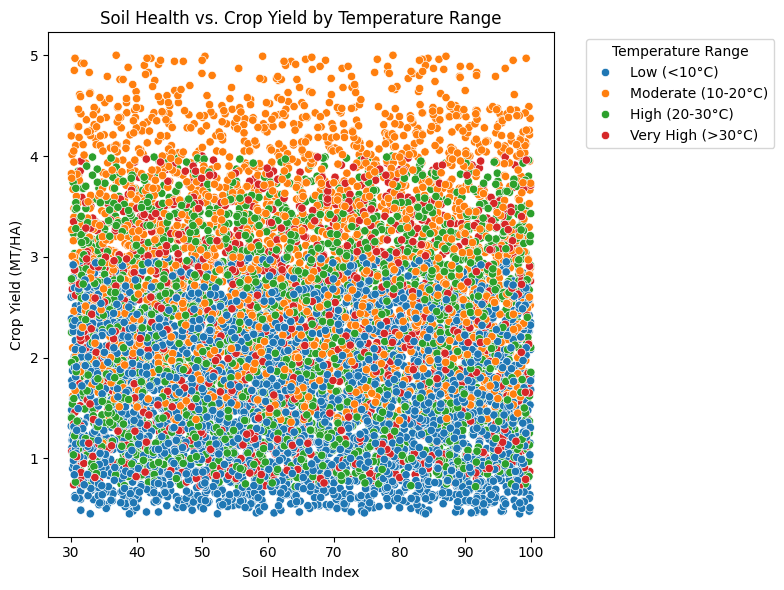

In [44]:
#Scatter Plot: Soil Health vs. Crop Yield by Temperature Range
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Soil_Health_Index', y='Crop_Yield_MT_per_HA', hue='Temperature_Range', data=df)
plt.title('Soil Health vs. Crop Yield by Temperature Range')
plt.xlabel('Soil Health Index')
plt.ylabel('Crop Yield (MT/HA)')
plt.legend(title='Temperature Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [46]:
#3 Soil Health vs. Crop Yield Under Different Precipitation Conditions
# Bin precipitation into ranges
df['Precipitation_Range'] = pd.cut(
    df['Total_Precipitation_mm'],
    bins=[-float('inf'), 500, 1500, 2500, float('inf')],
    labels=['Low (<500 mm)', 'Moderate (500-1500 mm)', 'High (1500-2500 mm)', 'Very High (>2500 mm)']
)
precip_soil_yield = df.groupby('Precipitation_Range')[['Soil_Health_Index', 'Crop_Yield_MT_per_HA']].mean()
print("\nAverage Soil Health Index and Crop Yield by Precipitation Range:\n", precip_soil_yield)



Average Soil Health Index and Crop Yield by Precipitation Range:
                         Soil_Health_Index  Crop_Yield_MT_per_HA
Precipitation_Range                                            
Low (<500 mm)                   65.577694              2.117155
Moderate (500-1500 mm)          65.096189              2.250615
High (1500-2500 mm)             65.100754              2.262441
Very High (>2500 mm)            63.742997              2.243917


<ipython-input-46-f402d029c37c>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  precip_soil_yield = df.groupby('Precipitation_Range')[['Soil_Health_Index', 'Crop_Yield_MT_per_HA']].mean()


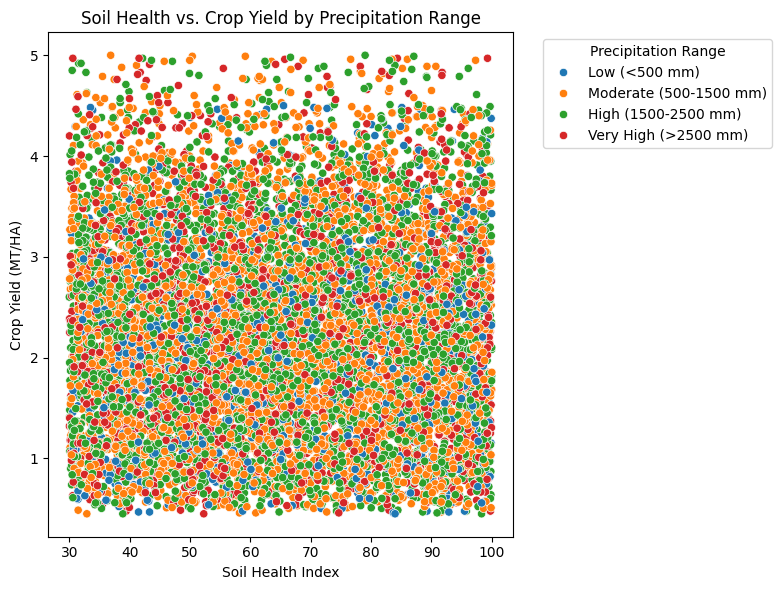

In [47]:
#Scatter Plot: Soil Health vs. Crop Yield by Precipitation Range
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Soil_Health_Index', y='Crop_Yield_MT_per_HA', hue='Precipitation_Range', data=df)
plt.title('Soil Health vs. Crop Yield by Precipitation Range')
plt.xlabel('Soil Health Index')
plt.ylabel('Crop Yield (MT/HA)')
plt.legend(title='Precipitation Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

How do pesticide and fertilizer use relate to crop yields in the context of changing climate patterns across different regions?

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1 Correlation Analysis
correlation = df[['Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Crop_Yield_MT_per_HA']].corr()
print("Correlation Matrix:\n", correlation)


Correlation Matrix:
                           Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  \
Pesticide_Use_KG_per_HA                  1.000000                 -0.015429   
Fertilizer_Use_KG_per_HA                -0.015429                  1.000000   
Crop_Yield_MT_per_HA                    -0.004035                  0.006423   

                          Crop_Yield_MT_per_HA  
Pesticide_Use_KG_per_HA              -0.004035  
Fertilizer_Use_KG_per_HA              0.006423  
Crop_Yield_MT_per_HA                  1.000000  


In [50]:
#2 Regional Analysis of Pesticide and Fertilizer Use vs. Crop Yield
region_analysis = df.groupby('Region')[['Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Crop_Yield_MT_per_HA']].mean()
print("\nAverage Pesticide and Fertilizer Use and Crop Yield by Region:\n", region_analysis)


Average Pesticide and Fertilizer Use and Crop Yield by Region:
                             Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  \
Region                                                                          
British Columbia                          24.424504                 49.554959   
Central                                   25.676695                 47.870901   
East                                      25.176190                 49.191355   
Grand Est                                 23.973386                 51.373976   
Ile-de-France                             24.579915                 50.531229   
Maharashtra                               23.658507                 50.194570   
Midwest                                   24.639051                 51.722134   
New South Wales                           25.436304                 48.002355   
North                                     25.022271                 49.400973   
North Central                             25

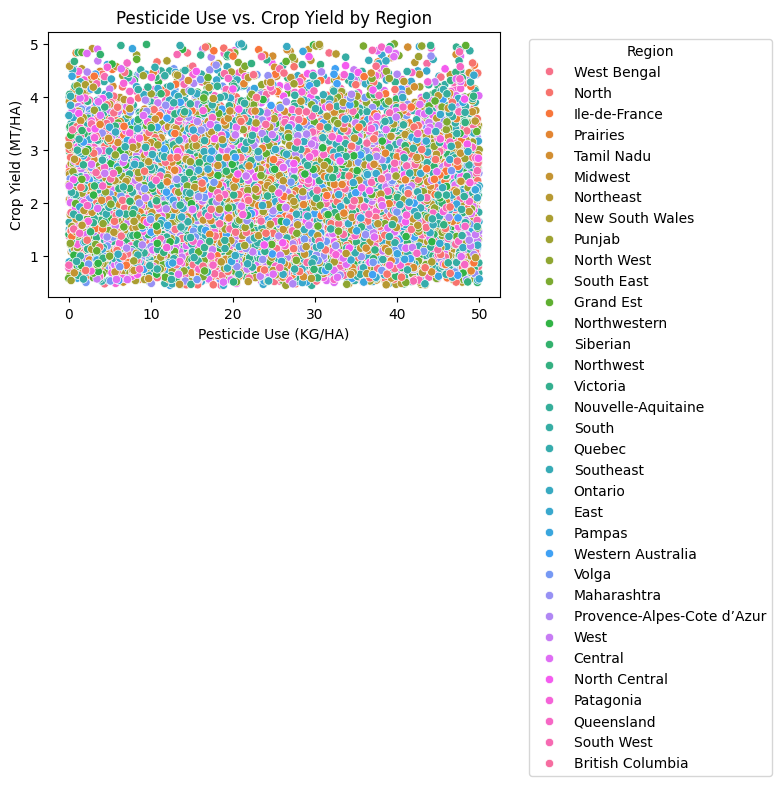

In [51]:
#3 Scatter Plot: Pesticide Use vs. Crop Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Pesticide_Use_KG_per_HA', y='Crop_Yield_MT_per_HA', hue='Region', data=df)
plt.title('Pesticide Use vs. Crop Yield by Region')
plt.xlabel('Pesticide Use (KG/HA)')
plt.ylabel('Crop Yield (MT/HA)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

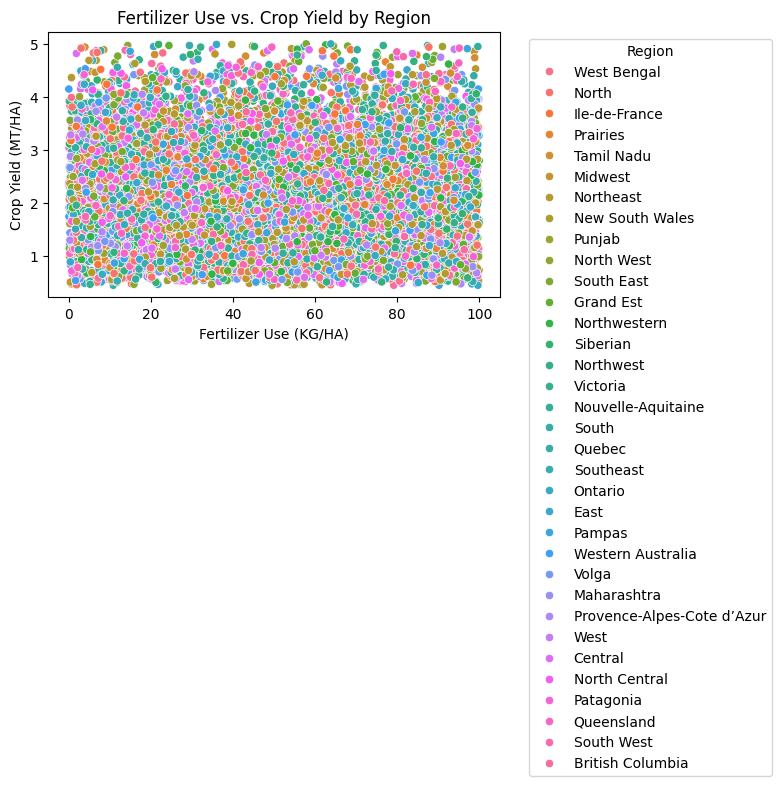

In [52]:
#4 Scatter Plot: Fertilizer Use vs. Crop Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fertilizer_Use_KG_per_HA', y='Crop_Yield_MT_per_HA', hue='Region', data=df)
plt.title('Fertilizer Use vs. Crop Yield by Region')
plt.xlabel('Fertilizer Use (KG/HA)')
plt.ylabel('Crop Yield (MT/HA)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [54]:
#5 Interaction with Climate Conditions: Group by Temperature Range
df['Temperature_Range'] = pd.cut(
    df  ['Average_Temperature_C'],
    bins=[-float('inf'), 10, 20, 30, float('inf')],
    labels=['Low (<10°C)', 'Moderate (10-20°C)', 'High (20-30°C)', 'Very High (>30°C)']
)
climate_analysis_temp = df  .groupby('Temperature_Range')[['Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Crop_Yield_MT_per_HA']].mean()
print("\nAverage Pesticide, Fertilizer Use, and Crop Yield by Temperature Range:\n", climate_analysis_temp)


Average Pesticide, Fertilizer Use, and Crop Yield by Temperature Range:
                     Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  \
Temperature_Range                                                       
Low (<10°C)                       24.782426                 50.792497   
Moderate (10-20°C)                25.228851                 49.798601   
High (20-30°C)                    24.998554                 48.857827   
Very High (>30°C)                 24.823899                 50.162163   

                    Crop_Yield_MT_per_HA  
Temperature_Range                         
Low (<10°C)                     1.634074  
Moderate (10-20°C)              3.028568  
High (20-30°C)                  2.288911  
Very High (>30°C)               2.305683  


<ipython-input-54-f95bd1f7563b>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  climate_analysis_temp = df  .groupby('Temperature_Range')[['Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Crop_Yield_MT_per_HA']].mean()


In [55]:
#6 Interaction with Precipitation: Group by Precipitation Range
df['Precipitation_Range'] = pd.cut(
    df['Total_Precipitation_mm'],
    bins=[-float('inf'), 500, 1500, 2500, float('inf')],
    labels=['Low (<500 mm)', 'Moderate (500-1500 mm)', 'High (1500-2500 mm)', 'Very High (>2500 mm)']
)
climate_analysis_precip = df.groupby('Precipitation_Range')[['Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Crop_Yield_MT_per_HA']].mean()
print("\nAverage Pesticide, Fertilizer Use, and Crop Yield by Precipitation Range:\n", climate_analysis_precip)


Average Pesticide, Fertilizer Use, and Crop Yield by Precipitation Range:
                         Pesticide_Use_KG_per_HA  Fertilizer_Use_KG_per_HA  \
Precipitation_Range                                                         
Low (<500 mm)                         25.285054                 50.132895   
Moderate (500-1500 mm)                24.691622                 50.747433   
High (1500-2500 mm)                   24.996509                 49.639560   
Very High (>2500 mm)                  25.214595                 49.006187   

                        Crop_Yield_MT_per_HA  
Precipitation_Range                           
Low (<500 mm)                       2.117155  
Moderate (500-1500 mm)              2.250615  
High (1500-2500 mm)                 2.262441  
Very High (>2500 mm)                2.243917  


<ipython-input-55-3997c82c3e32>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  climate_analysis_precip = df.groupby('Precipitation_Range')[['Pesticide_Use_KG_per_HA', 'Fertilizer_Use_KG_per_HA', 'Crop_Yield_MT_per_HA']].mean()


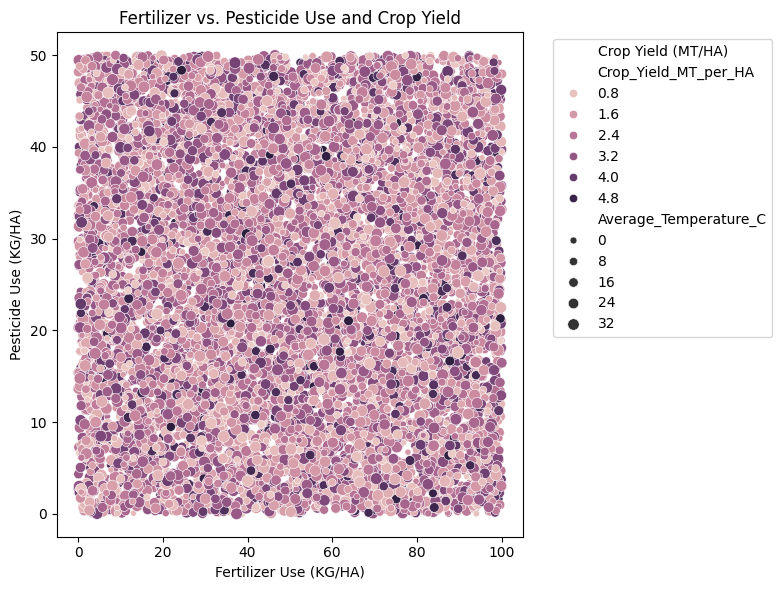

In [56]:
#7 Combined Scatter Plot: Fertilizer vs. Pesticide Use
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Fertilizer_Use_KG_per_HA', y='Pesticide_Use_KG_per_HA', hue='Crop_Yield_MT_per_HA', size='Average_Temperature_C', data=df)
plt.title('Fertilizer vs. Pesticide Use and Crop Yield')
plt.xlabel('Fertilizer Use (KG/HA)')
plt.ylabel('Pesticide Use (KG/HA)')
plt.legend(title='Crop Yield (MT/HA)', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

What is the economic impact of various adaptation strategies on agricultural productivity in different countries and regions?

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1 Average Economic Impact by Adaptation Strategy
strategy_economic_impact = df.groupby('Adaptation_Strategies')['Economic_Impact_Million_USD'].mean().sort_values(ascending=False)
print("Average Economic Impact by Adaptation Strategy:\n", strategy_economic_impact)

Average Economic Impact by Adaptation Strategy:
 Adaptation_Strategies
Drought-resistant Crops    686.226637
Crop Rotation              685.324149
No Adaptation              677.879363
Organic Farming            663.542228
Water Management           658.843997
Name: Economic_Impact_Million_USD, dtype: float64


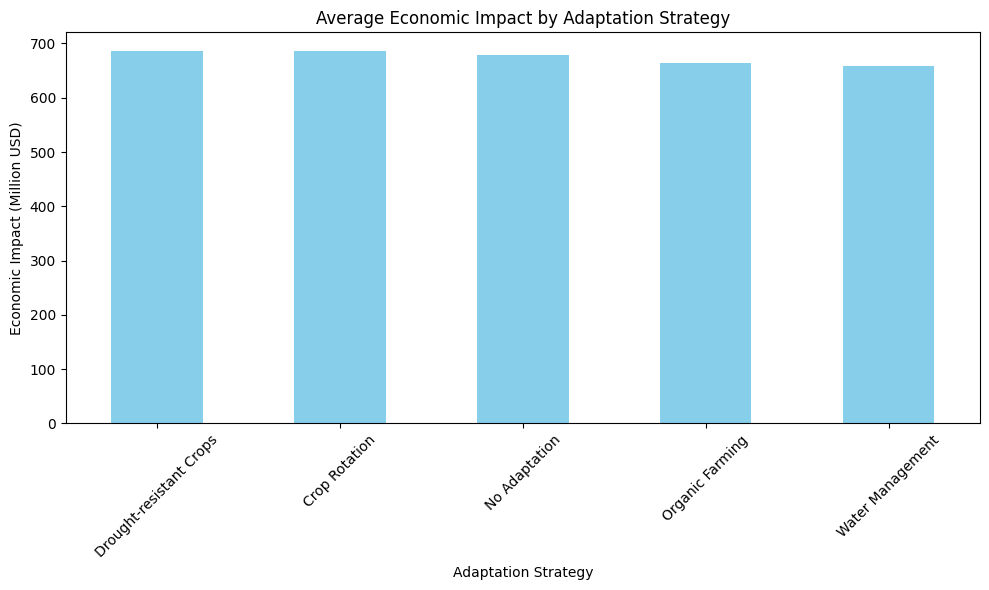

In [60]:
#Bar Plot: Economic Impact by Adaptation Strategy
plt.figure(figsize=(10, 6))
strategy_economic_impact.plot(kind='bar', color='skyblue')
plt.title('Average Economic Impact by Adaptation Strategy')
plt.xlabel('Adaptation Strategy')
plt.ylabel('Economic Impact (Million USD)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [61]:
#2 Regional Economic Impact by Adaptation Strategy
regional_impact = df.groupby(['Region', 'Adaptation_Strategies'])['Economic_Impact_Million_USD'].mean().unstack()
print("\nRegional Economic Impact by Adaptation Strategy:\n", regional_impact)


Regional Economic Impact by Adaptation Strategy:
 Adaptation_Strategies       Crop Rotation  Drought-resistant Crops  \
Region                                                               
British Columbia               750.119756               711.559792   
Central                        754.723067               753.476087   
East                           763.854783               775.226000   
Grand Est                      619.053556               696.951500   
Ile-de-France                  797.085870               693.040889   
Maharashtra                    589.264390               728.089773   
Midwest                        602.903559               693.461923   
New South Wales                705.229286               622.467971   
North                          683.345253               586.765463   
North Central                  702.287451               816.584510   
North West                     635.395636               703.630714   
Northeast                      667.0926

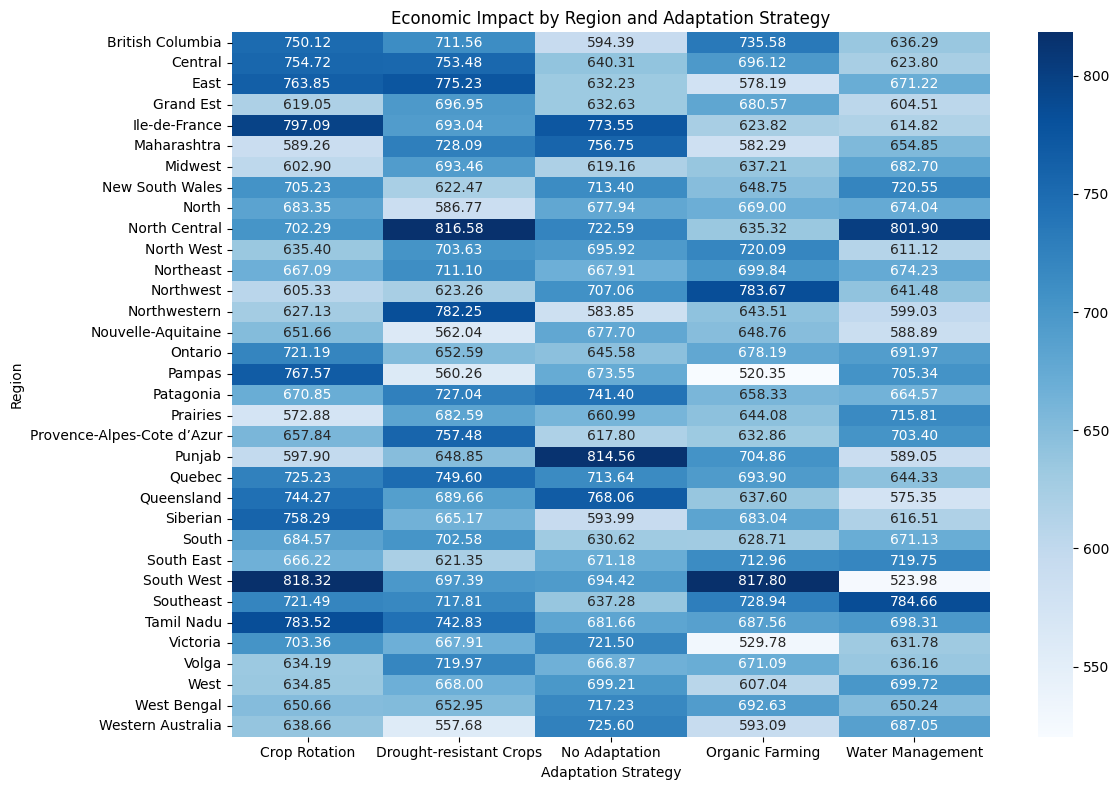

In [62]:
#Heatmap: Economic Impact by Region and Adaptation Strategy
plt.figure(figsize=(12, 8))
sns.heatmap(regional_impact, annot=True, fmt=".2f", cmap="Blues")
plt.title('Economic Impact by Region and Adaptation Strategy')
plt.xlabel('Adaptation Strategy')
plt.ylabel('Region')
plt.tight_layout()
plt.show()

In [63]:
#3 Country-Level Analysis of Economic Impact
country_impact = df.groupby(['Country', 'Adaptation_Strategies'])['Economic_Impact_Million_USD'].mean().unstack()
print("\nCountry-Level Economic Impact by Adaptation Strategy:\n", country_impact)


Country-Level Economic Impact by Adaptation Strategy:
 Adaptation_Strategies  Crop Rotation  Drought-resistant Crops  No Adaptation  \
Country                                                                        
Argentina                 683.977722               659.517056     699.940887   
Australia                 697.359623               633.721589     731.286868   
Brazil                    686.050899               680.467684     646.285053   
Canada                    690.414694               694.404081     652.933196   
China                     715.878438               724.109171     652.640000   
France                    679.830964               682.276378     680.858398   
India                     663.624488               688.018073     740.011991   
Nigeria                   708.888522               710.967968     696.123289   
Russia                    687.537970               719.436023     617.747513   
USA                       639.680508               676.744744   

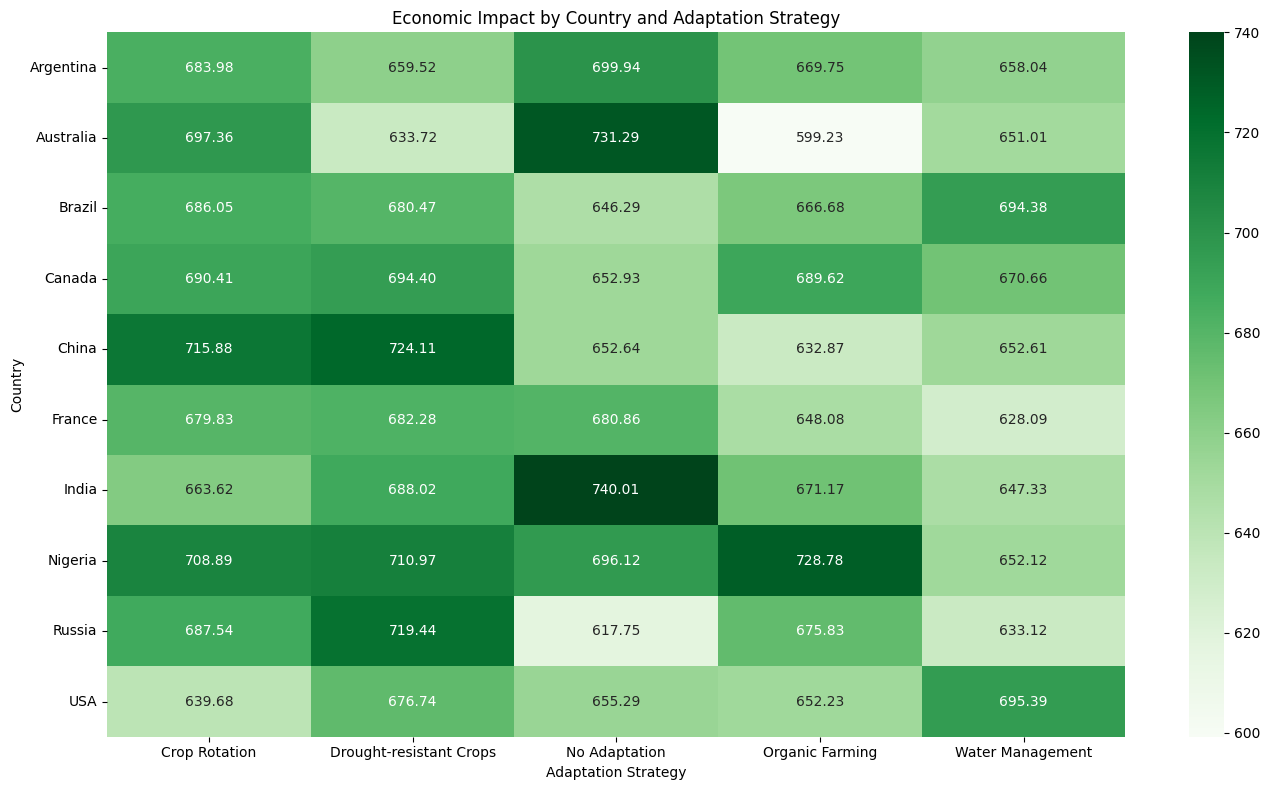

In [64]:
#Heatmap: Economic Impact by Country and Adaptation Strategy
plt.figure(figsize=(14, 8))
sns.heatmap(country_impact, annot=True, fmt=".2f", cmap="Greens")
plt.title('Economic Impact by Country and Adaptation Strategy')
plt.xlabel('Adaptation Strategy')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

In [65]:
#4 Correlation Between Economic Impact and Productivity
correlation = df[['Economic_Impact_Million_USD', 'Crop_Yield_MT_per_HA']].corr().iloc[0, 1]
print(f"\nCorrelation Between Economic Impact and Crop Yield: {correlation:.2f}")



Correlation Between Economic Impact and Crop Yield: 0.73


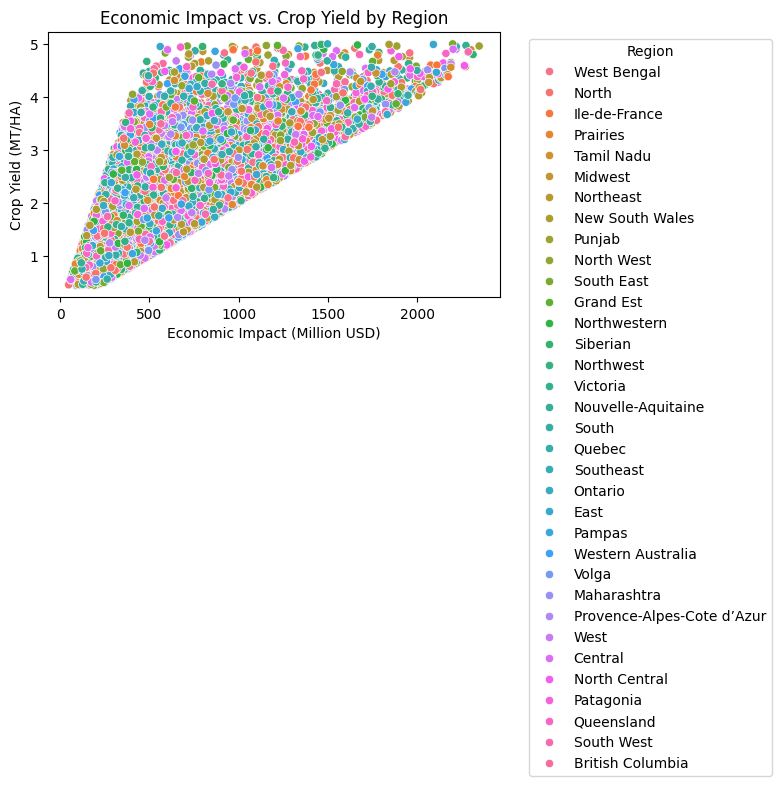

In [66]:
#Scatter Plot: Economic Impact vs. Crop Yield
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Economic_Impact_Million_USD', y='Crop_Yield_MT_per_HA', hue='Region', data=df  )
plt.title('Economic Impact vs. Crop Yield by Region')
plt.xlabel('Economic Impact (Million USD)')
plt.ylabel('Crop Yield (MT/HA)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()